# Training MNIST Handwritten Digit

In [1]:
# basic torch libraries
import torch
import torchvision

# data loading and transforming
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

# basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict


import torch.nn as nn
import torch.nn.functional as F

# Get the data and define the network
[previous work](https://github.com/bmaxdk/NN-PyTorch/blob/main/07_MNIST/MNIST_Handwritten_Digit.ipynb) will be used of training.



In [2]:
data_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

path = 'MNIST_data/'
#Download Training datasets
train_data = MNIST(root=path,
                   train=True,
                   download=True,
                   transform=data_transform)

#Download Test datasets
test_data = MNIST(root=path,
                  train=False,
                  download=True,
                  transform=data_transform)

# Print out some stats about the training data
print('Train data, number of images', len(train_data))

# Print out some stats about the training data
print('Test data, number of images', len(test_data))


# shuffle the data and load in image/label data in batches of size 64
# Depends on large or small size of batch size will affect the loss
batch_size = 64

# load train
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# load test
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)



Train data, number of images 60000
Test data, number of images 10000


In [3]:
# Hyperparameters for the network
input_size = 28*28 # 784
hidden_sizes = [128, 64] # [# of units in hidden layer 1, # of units in hidden layer 2]
output_size = 10 # output class 0-9


model = nn.Sequential(OrderedDict([
                        ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                        ('relu1', nn.ReLU()),
                        ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                        ('relu2', nn.ReLU()),
                        ('logits', nn.Linear(hidden_sizes[1], output_size))]))
print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (logits): Linear(in_features=64, out_features=10, bias=True)
)


# Training the Network

## Loss function and Optimizer
Loss function typically uses cross entropy loss criterion = nn.CrossEntropyLoss(); Cross entropy loss combines softmax and NLL loss (nn.NLLLoss()).
NLL Loss being uesd for the output of Net is a distribution of class scores which this condtion fit to the model.

Some standard stochastic optimizers are stochastic gradient descent and Adam.

Apply momentum. It helps to find and then move on from local minimums and find the global minimum

In [4]:
# additional necessary package for optimizer
import torch.optim as optim

# # Apply NLL Loss for distribution of class scores
# criterion = nn.NLLLoss()
####
# using cross entropy which combines sftmax and NLL loss
criterion = nn.CrossEntropyLoss()

# Optimizer used SGD with small learning rate 0.01
# optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
#try without momentum
optimizer = optim.SGD(model.parameters(), lr=0.01)

####

Let's see the

In [5]:
print('Initial weights - ', model.fc1.weight)
print('Initial biases - ', model.fc1.bias)

Initial weights -  Parameter containing:
tensor([[ 0.0234, -0.0124, -0.0341,  ...,  0.0185,  0.0094,  0.0355],
        [ 0.0048,  0.0315,  0.0182,  ...,  0.0056, -0.0342, -0.0049],
        [-0.0041, -0.0034,  0.0247,  ...,  0.0040, -0.0076,  0.0153],
        ...,
        [-0.0338, -0.0019,  0.0193,  ...,  0.0140, -0.0032,  0.0028],
        [-0.0034, -0.0090, -0.0342,  ..., -0.0104, -0.0110, -0.0009],
        [-0.0238,  0.0196,  0.0314,  ..., -0.0200,  0.0289,  0.0300]],
       requires_grad=True)
Initial biases -  Parameter containing:
tensor([-0.0074,  0.0348,  0.0084,  0.0167, -0.0020, -0.0337, -0.0185, -0.0009,
        -0.0328,  0.0023,  0.0071, -0.0351,  0.0268, -0.0180,  0.0004,  0.0134,
         0.0236, -0.0036,  0.0038, -0.0050, -0.0036,  0.0111,  0.0078, -0.0082,
        -0.0112,  0.0355, -0.0037, -0.0218, -0.0009, -0.0212,  0.0240, -0.0193,
         0.0076, -0.0016,  0.0254, -0.0005, -0.0307,  0.0101,  0.0205, -0.0062,
        -0.0158,  0.0013, -0.0352,  0.0036,  0.0256, -0.02

Let's run one learning step before looping through all the data.

In [6]:
# obtain one batch of training images
# iter
# dataiter = iter(train_loader)
# images, labels = dataiter.next()
images, labels = next(iter(train_loader))
images.resize_(batch_size, input_size) #(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model.fc1.weight.grad)
optimizer.step()


Gradient - tensor([[ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020],
        ...,
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007]])


/home/eightun/anaconda3/lib/python3.7/site-packages/torch/autograd/__init__.py:147: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag


In [7]:
print('Updated weights - ', model.fc1.weight)

Updated weights -  Parameter containing:
tensor([[ 0.0234, -0.0124, -0.0341,  ...,  0.0185,  0.0093,  0.0355],
        [ 0.0048,  0.0315,  0.0182,  ...,  0.0056, -0.0342, -0.0049],
        [-0.0041, -0.0034,  0.0247,  ...,  0.0041, -0.0076,  0.0153],
        ...,
        [-0.0338, -0.0019,  0.0193,  ...,  0.0140, -0.0032,  0.0028],
        [-0.0033, -0.0090, -0.0342,  ..., -0.0103, -0.0110, -0.0009],
        [-0.0238,  0.0196,  0.0314,  ..., -0.0200,  0.0289,  0.0300]],
       requires_grad=True)


## Training the Network
Loop over the training dataset in batches and record the loss 

In [8]:
# with momentum
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

In [9]:
def train(epochs):
    # collect loss as the network trains
    loss_over_time = []
    steps = 0
    print_every = 40
    
    # loop over the dataset
    for epoch in range(epochs):
        
        running_loss = 0.0
        
        for images, labels in iter(train_loader):
            steps += 1
            
            # Flatten MNIST images into a 784 long vector
            images.resize_(images.size()[0], 784)
            
            # Zero the parameter(weight) gradients
            optimizer.zero_grad()

            # Forward pass to get outputs
            outputs = model.forward(images)

            # Calculate the loss
            loss = criterion(outputs, labels)

            # backward pass o calculate the parameter gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            #Print loss stat to convert loss into a scalar and add it to running_loss, here used .item()
            running_loss += loss.item()
            
            # show stat. at every 40
            if steps % print_every == 0:
                avg_loss = running_loss/print_every
                # record and print avg loss over 40 batches
                loss_over_time.append(avg_loss)
                
                print("Epoch: {}/{}... ".format(epoch+1, epochs),
                      "Loss: {:.4f}".format(avg_loss))
                running_loss = 0.0
    
    print("Finished Training")
    
    return loss_over_time

In [10]:
# define the number of epochs to train for
# start with small epochs to see if model works initially
n_epochs = 3

# call train and record the loss over time
training_loss = train(n_epochs)

Epoch: 1/3...  Loss: 2.2308
Epoch: 1/3...  Loss: 1.9203
Epoch: 1/3...  Loss: 1.3859
Epoch: 1/3...  Loss: 0.9477
Epoch: 1/3...  Loss: 0.7284
Epoch: 1/3...  Loss: 0.6146
Epoch: 1/3...  Loss: 0.5313
Epoch: 1/3...  Loss: 0.4857
Epoch: 1/3...  Loss: 0.4412
Epoch: 1/3...  Loss: 0.4106
Epoch: 1/3...  Loss: 0.4327
Epoch: 1/3...  Loss: 0.4434
Epoch: 1/3...  Loss: 0.4002
Epoch: 1/3...  Loss: 0.3689
Epoch: 1/3...  Loss: 0.3627
Epoch: 1/3...  Loss: 0.3525
Epoch: 1/3...  Loss: 0.3463
Epoch: 1/3...  Loss: 0.3515
Epoch: 1/3...  Loss: 0.3279
Epoch: 1/3...  Loss: 0.3260
Epoch: 1/3...  Loss: 0.3297
Epoch: 1/3...  Loss: 0.3345
Epoch: 1/3...  Loss: 0.2956
Epoch: 2/3...  Loss: 0.1745
Epoch: 2/3...  Loss: 0.3196
Epoch: 2/3...  Loss: 0.3073
Epoch: 2/3...  Loss: 0.3359
Epoch: 2/3...  Loss: 0.2931
Epoch: 2/3...  Loss: 0.2942
Epoch: 2/3...  Loss: 0.2575
Epoch: 2/3...  Loss: 0.2979
Epoch: 2/3...  Loss: 0.2736
Epoch: 2/3...  Loss: 0.2939
Epoch: 2/3...  Loss: 0.3059
Epoch: 2/3...  Loss: 0.2594
Epoch: 2/3...  Loss:

In [11]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    

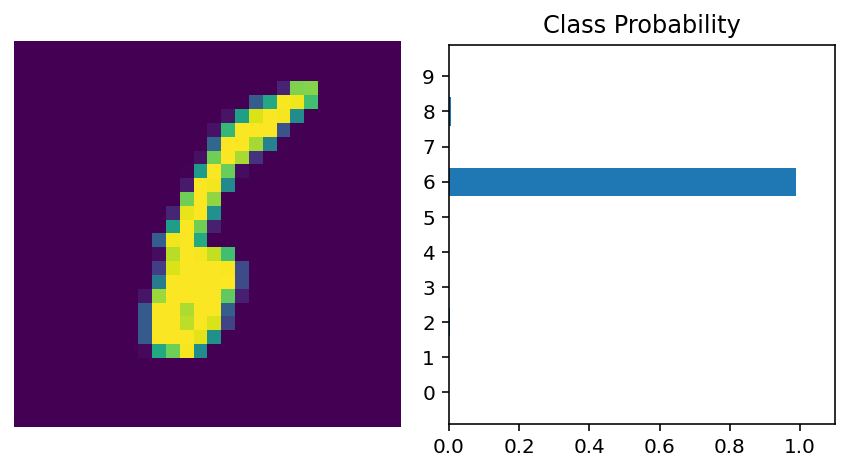

In [16]:
images, labels = next(iter(train_loader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), ps)

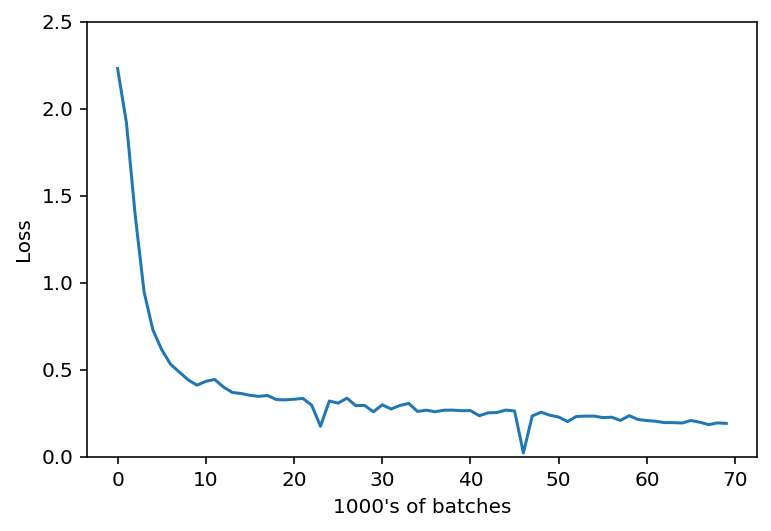

In [13]:
# Visualize the Loss
plt.plot(training_loss)
plt.xlabel('1000\'s of batches')
plt.ylabel('Loss')
plt.ylim(0, 2.5)
plt.show()
           